In [ ]:
## Download dataset method definition
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
  

In [4]:
# Download dataset
fetch_housing_data();

In [5]:
# Load CSV dataset
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path) 

In [6]:
# Show dataset
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# data types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# Group by value and count how many of each there are
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# Gives some information for the numeric fields
# The 25%, 50% and 75% represent de 1st quartile, the median, and the 3rd quartile
# The 1st quartile is the value of which 25% of observations are below
# ie: 25% of the rows are below 18 years (in housing_median_age)
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


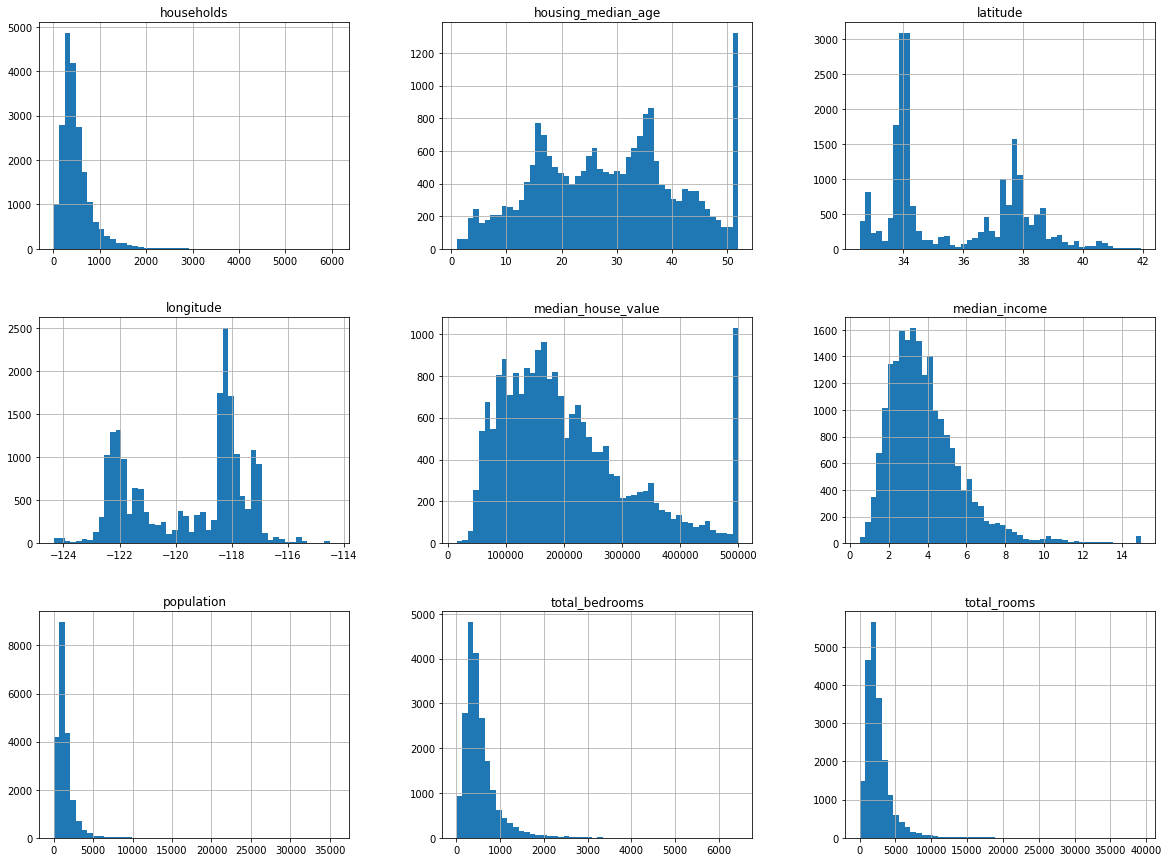

In [10]:
# This line sets matplotlib graphic engine to the jupyters notebook.
%matplotlib inline

# Plots a histogram of every field
import matplotlib.pyplot as plot
housing.hist(bins=50, figsize=[20,15])
plot.show()

In [11]:
# As the median income is an important feature to set the house value
# We want the test set to include representative amounts of persons for different income values
# So we create 5 groups of income and store them in housing["income_cat"]

import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [12]:
# Using scikit we create a test set representative of the strata.
# This means, we want to have a representative amount of each median_income group.
# ie: If in the entire set there are 10 in group 1 and 20 in group 2.
# It makes sense to take 1 from group one, but 2 from group 2, to keep the test set representative

from sklearn.model_selection import StratifiedShuffleSplit

stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in stratified.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
# This is the distribution of the income_cat field in the entire set
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [14]:
# This is the distribution of the income_cat field in the test set
# Note how the distributions are similar thanks to the stratified sampling
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [15]:
# Renormalize dataset, remove income_cat field
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [16]:
# Get the training set
housing = strat_train_set.copy()

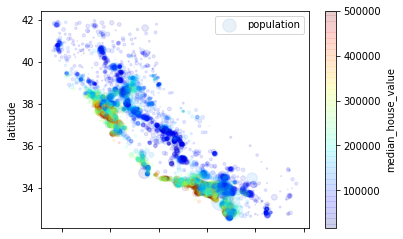

In [17]:
# Plot latitude and longitude
housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             alpha=0.1,
             s=housing["population"] / 100,
             label="population",
             c="median_house_value",
             cmap=plot.get_cmap("jet"),
             colorbar=True)
plot.legend()

In [19]:
# Search for correlations with median_house_value
# The value means: If closer to 1, means that as the median_house_value grows, the other field grows
# If closer to -1, as the median_house_value grows, the other field go down
# NOTE: It only measures LINEAR correlations.
housing.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

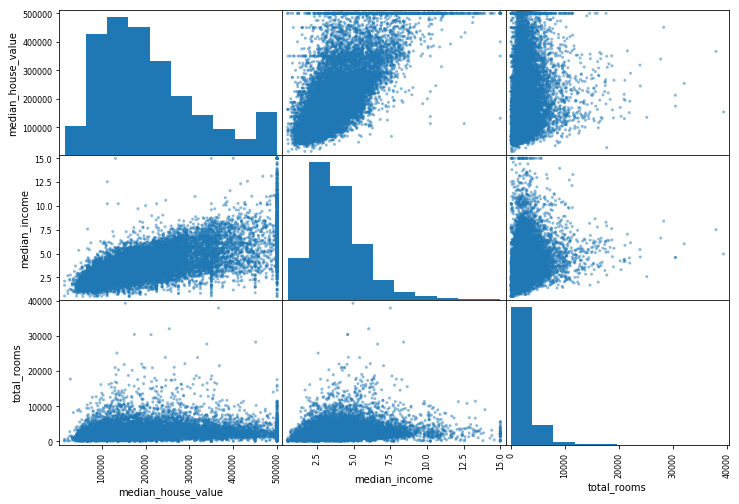

In [26]:
# Scatter plot to compare fields
# We check those who have a strong correlation as seen in the previous cell
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms"]
scatter_matrix(housing[attributes],
              figsize=[12,8])
plot.show()

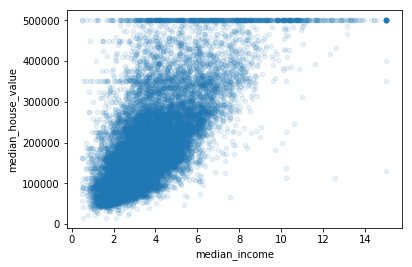

In [29]:
# Plot the most correlated graph
# The correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed
housing.plot(kind="scatter",
            x="median_income",
            y="median_house_value",
            alpha=0.1)

In [30]:
# We can create new fields, as a function of other fields, which could be 
# more correlated to the objective than the individual fields.
# In this case, bedrooms_per_room is much more correlated than total_rooms and total_bedrooms
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
housing.corr()["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [32]:
# Go back to the original training set.
# Separate it in predictors and labels
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [34]:
# Fill null values with median
# Have to remove string value
# Medians: [ -118.51 , 34.26 , 29. , 2119. , 433. , 1164. , 408. , 3.5414]

from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1);
imputer.fit(housing_num); # Calculates medians
X = imputer.transform(housing_num); # Replaces null for medians
housing_tr = pd.DataFrame(X, columns=housing_num.columns);

In [40]:
# Map ocean_proximity to numbers
from sklearn.preprocessing import LabelEncoder

ocean_proximity = housing["ocean_proximity"];
encoder = LabelEncoder()
ocean_proximity_num = encoder.fit_transform(ocean_proximity) # Map labels, and replace them

# encoder.classes_ to see the mapping

In [42]:
# Now there's an issue.
# The algorithm will think that the classes 0 and 1 are "closer"
# But semantically, it has no sense for us.
# So we map the number to a vector. Where every value is 0 except the index equal to the mapped number.
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder();
ocean_proximity_cat = encoder.fit_transform(ocean_proximity_num.reshape(-1, 1))

# This returns a sparse matrix. Which stores the non-zero indexes instead of the full matrix
# It's more performant


In [46]:
# An alternative to the previous two steps, is to use the next:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer();
ocean_proximity_cat = encoder.fit_transform(housing["ocean_proximity"])
ocean_proximity_cat

# It returns a NumPy matrix, not a sparse one.
# Have to pass sparse_output=True to get the sparse matrix.

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [51]:
# Custom transformers allow you to transform the data in a way that allows you to pipeline
# different transformations with other scikit transforms.

# Feature scaling is essential because most algorithms don't work with dispair scales.
# There are two scalings: Normalization (Squeeze between 0 and 1)
# and Standarization (Put the mean to 0, and divide by variance, to have variance of 1)
# Normalization works better for neural networks
# Standarization works better if there are any outliers
from sklearn.preprocessing import StandardScaler

In [52]:
# This is how pipelines work.
# A fit() on the pipeline calls fit_transform() for each son, except for the last one (only fit)
# A transform() transforms the data applying the fit results.
# A feature union executes in parallel both pipelines and then merges

from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer()),
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

TypeError: fit_transform() takes 2 positional arguments but 3 were given